<font size="5">
 <div class="alert alert-block alert-info"><b>Master in Data Science - Iscte <b>
     </div>
</font> 
 
 
     
    
  <font size="5"> OEOD </font>
  
  
  
  <font size="3"> **Diana Aldea Mendes**, november 2023 </font>
  
   
  <font size="3"> *diana.mendes@iscte-iul.pt* </font> 
  
    
 
  
    
  <font color='blue'><font size="5"> <b>Week 7 - Traveling Salesman/Nurse Problem (TSP)<b></font></font>


#########################################################

- More info here: https://github.com/TheoLvs/reinforcement-learning/tree/master/5.%20Delivery%20Optimization    
- `OR-Tools` open source library by **Google** (operation research based, not RL)

# Traveling Salesman Problem
    
    
- The **Traveling Salesman Problem (TSP)** has been solved for many years and used for several real-life situations including optimizing deliveries/logistics, astronomy, image processing, DNA sequencing, or network routing. 

- TSP is an optimization problem, where we have to find the shortest route to visit (make deliveries) different cities (given the matrix of distances between these cities). 

- There are many different ways to solve this problem using discrete optimization techniques (see **Google OR-Tools** in Python)

- Note that, finding an optimal solution is a NP-hard problem — and there exists N! different possible ways to assemble a tour visiting N cities (very expensive to compute all combinations:  with 5 points to visit there are 120 possible routes, but with 10 points there are 3,628,800 possible routes, and with 20 points to visit there are 2,432,902,008,176,640,000 routes!)

- NP-hard problems are ‘solved’ by using a **heuristic algorithm**. 
- Heuristic algorithms follow a method designed to efficiently give a sufficiently good solution at the expense of not guaranteeing that an optimal solution is found.

- Advanced companies add Machine Learning techniques on top of heuristic algorithms to better estimate in-context durations (and to take into account multiple vehicle fleet, electric vehicle charging, time window constraints, capacity constraints, aleatory perturbations, etc... ).

____________________________________________________________


- We present a simple framework to apply **Q-Learning to solving the TSP**
- Reinforcement Learning (in theory) would hold many advantages compared to classical optimization techniques :
    - Offering a general framework for all problems (instead of tweaking the constraints and defining extra variables, you can change the reward, and defining a multi-agent problem if needed for fleet optimization. Adding extra information like delivery time estimation is also eased if you can integrate the prediction algorithm with a similar ML techniques (e.g. Neural Networks)
    - Having a "live" decision making algorithm. Because you would train a RL algorithm by making the next delivery decision at each stop, compared to "off-line" optimization algorithms that study the problem with no unknowns 
    - Being robust to unknowns and aleatory perturbations

___________________________________________________________________________

- **Transforming the TSP to a RL problem**
    - TSP simplest version:
        - a delivery man has to deliver 10 (50, 100) packages. 
        - between each stop can be defined a distance or a duration (or a more complex metric).

- To transform it to a RL problem, we need to define:

    - **Agent**: the delivery man
    - **Environment**: the different packages to deliver (and their destination) and the city where to navigate
    - **States**: the location where the delivery man currently stops
    - **Actions**: at each location, the decisions to make (modeled as a Markov process) are: "where to go next" 
    - **Reward**: Between two locations (states), how long (or how far) it is (for example: the time elapsed between two travels which is calculated by taking the euclidean distance between two points plus a gaussian noise)
    
- Creating the routing environment
    - Creating a simple version of the environment is simple in Python.
    - The convention used are the same as for OpenAI Gym's environments
    - Store the position of the stops in a 2D virtual world as a numpy array or a Pandas DataFrame. 
    - Distances between stops can be calculated with an euclidean distance, but it could be complexified to account for durations or represent any distance/duration metric you would see in a routing network.


- More complex environment, where we can add:

    - Traffic zone size 
    - Traffic intensity 
    - Multi-agents
    - Time constraints (for delivery, for charge, etc)



- The algorithm
    - Q-Learning
    - An epsilon-greedy strategy allow to discover new paths and strategies while exploring

________________________________________________________

- Next steps
    - Test other simple algorithms like SARSA
    - Switch from discrete to continuous problems with **Deep-Q-Learning** (continuous observation space) 

## Example 1

In [1]:
## libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import time
%config InlineBackend.figure_format = 'svg'

In [2]:
## import script where most functions are implemented (Gym style)
from delivery import *

In [3]:
## define environment with 10 stops(cities/locations)
env = DeliveryEnvironment(n_stops = 10)

NameError: name 'DeliveryEnvironment' is not defined

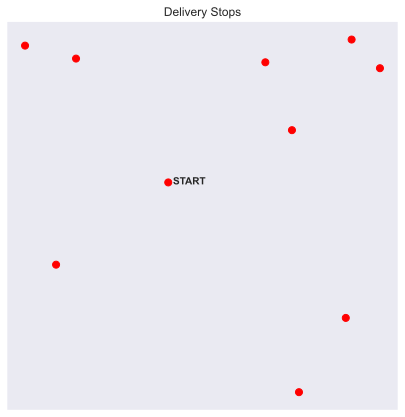

In [58]:
## use render function to print the environment
env.render()

In [59]:
env.stops

[5]

In [60]:
## update env 4 times (4 actions) (returns the next agent observation and the reward for taking that actions)
for i in [0,1,2,3]:
    env.step(i)

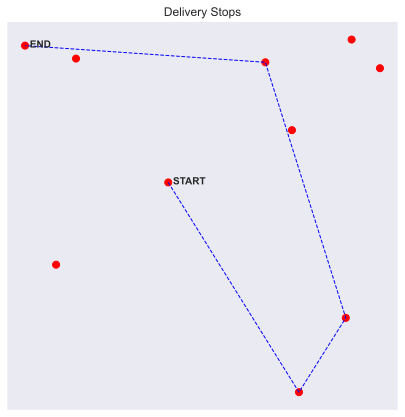

In [61]:
# We can visualize routes by drawing lines between each stop
env.render()

In [62]:
## Q-learning
import sys
sys.path.append("../")

from delivery import run_episode,DeliveryQAgent,run_n_episodes

### Case 1 - simple (no traffic conditions)

Initialized Delivery Environment with 500 random stops
Target metric for optimization is distance


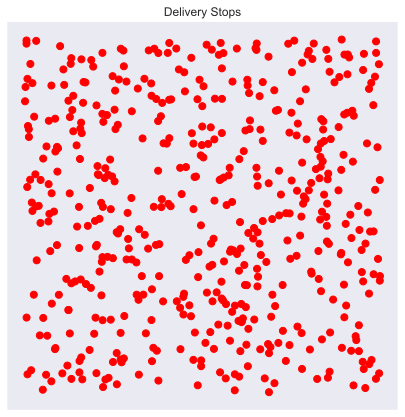

In [63]:
## environment
## increase the number of stops and define the distance method
env = DeliveryEnvironment(n_stops = 500, method = "distance")

In [64]:
## define agent
# give to the agent information about state space and action space
agent = DeliveryQAgent(env.observation_space,env.action_space)


__________________________________________________________

- Note that: the Q-Learning algorithm may not work for a higher number of delivery points.
- With Q-Learning we evaluate a matrix mapping states, actions and rewards. 
- To make a decision in a given state about the best actions to do, we need to have an estimate if the decision was the best in the long term.

- In our case, the rows are the different states (all the stops) and the columns the possible actions to take in this state, hence the next stop to go. 
- The values are the estimated long-term reward you would get by taking this action. 
- So, if we are in a state A, we would like to take the action with the maximum Q value.

- For the considered TSP problem, we have a Q-Matrix of 50 by 50 if we have 50 stops.
- We can initalize the Q matrix with the distance matrix between all stops (instead random values)



____________________________________________

- How to update the values and incorporate long-term planning? 
- Solution: Q-Learning algorithm. 
- This is the update rule in basic Q-Learning, where you increment the Q-value for each action in each experience replay (simulating a day of delivery hundreds of time) by the current reward + the reward for the best possible action you would take in the future. 
- This recursive equation is a variation of the famous Bellman equation for Q value functions.


______________________________________________

- Writing the training loop: Once we have define the environment, the Q-Agent and the update rules for the value function, we only need the final step: the training loop. 

    - Reset the environment
    - Make a decision of the next state to go to
    - Remember the reward gained by this decision (minimum duration or distance elapsed)
    - Train our agent with this knowledge
    - Make the next decision until all stops are traversed

  0%|          | 0/1000 [00:00<?, ?it/s]

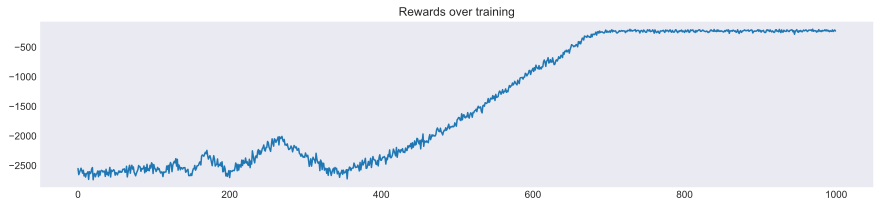

(<delivery.DeliveryEnvironment at 0x1c3bb3e5ed0>,
 <delivery.DeliveryQAgent at 0x1c3baaba750>)

In [65]:
## run episodes - the output shows the reward evolution during the training/learning process
run_n_episodes(env,agent,"training_500_stops.gif")

________________________________________________

#### Results
- **Q-Learning for a simple TSP**
- When we start training and experiencing the same problem overtime, ther agent learns about the environment, this is shown by the episode rewards values for each experience replay.
- In the first phase, until the 400th episode, we still explore the different routes. 
- With the epsilon decay method (with epsilon_decay=0.999), we are taking random actions at each step.
- In the second phase, epsilon is lowering, and we start exploiting what we have learnt, and take less and less random actions to be more driven by Q values.
- In each experiment, the algorithm converges quite fast to a seamingly acceptable route. 
- After exploring several options - gives one route and variations of the accepted strategy.



### Case 2: with traffic

Initialized Delivery Environment with 100 random stops
Target metric for optimization is traffic_box


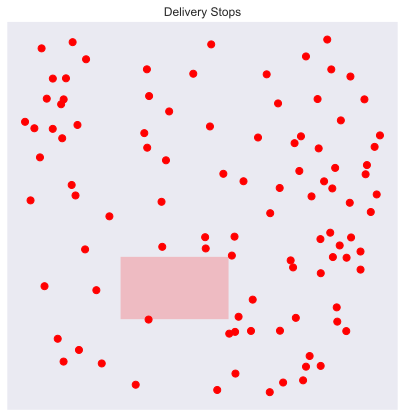

In [66]:
## define environment with traffic (use a box to delimitate the traffic zone)

env = DeliveryEnvironment(n_stops = 100,method = "traffic_box",box_size = 0.6,traffic_intensity = 100)

In [67]:
## define agent
agent = DeliveryQAgent(env.observation_space,env.action_space)

  0%|          | 0/1000 [00:00<?, ?it/s]

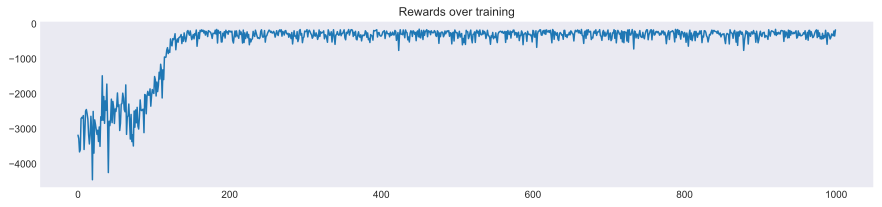

(<delivery.DeliveryEnvironment at 0x1c3e1d79750>,
 <delivery.DeliveryQAgent at 0x1c3e79dc850>)

In [68]:
## train the algorithm
run_n_episodes(env,agent,"training_100_stops_traffic.gif")

_______________________________________________

#### Results
- **Q-Learning for a TSP with traffic zones**
- Now that we have our environment, agent and framework defined, what's great with RL is that we don't have to change anything but the reward to model a different situation. 
- Indeed because we tweaked the reward when we drove through a traffic zone, the agent will learn the same way to optimize his route and the agent will avoid as much as possible the traffic zones.

- With more points, it's even more interesting, the agent will really circle around the traffic zone and prefer longer but faster routes.

_______________________________________________________



⛔ Cons:
- Slower than optimization algos
- Less accurate than a discrete optimization technique

✅ Pros:
- General framework to be updated in real-life situations (eg: the traffic) and extended to more complex problems
- Alternative routes are proposed
- "Online" decision making (meaning that you have an algorithm armed with a next-best decision recommendation system)

______________________________________

- Next steps is to extend the work to an even more global framework to account for multiple vehicle fleets, charging stations and more. 
- This will require to use Deep Reinforcement Learning because states could not be represented as a matrix.

# Example 2

In [3]:
#!pip install pulp

In [4]:
from pulp import *  ## optimization modeling library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sn

In [8]:
#!pip install gurobipy

In [22]:
#a handful of sites
sites = ['Barcelona','Belgrade','Berlin','Brussels','Bucharest','Budapest','Copenhagen','Dublin','Hamburg','Istanbul','Kiev','London','Madrid','Milan','Moscow','Munich','Paris','Prague','Rome','Saint Petersburg','Sofia','Stockholm','Vienna','Warsaw']
# sites = ['Barcelona','Belgrade','Berlin','Brussels','Bucharest','Budapest','Copenhagen']
latlng = ['latitude', 'longitude']
position = pd.read_csv('position.csv', index_col="City")
flighttime = pd.read_csv('flight_time.csv', index_col="City")
distance = pd.read_csv('distance.csv', index_col="City")
position.head(5)
# print(len(sites))

,latitude,longitude
City,,
Barcelona,41.3888,2.1590
Belgrade,44.8040,20.4651
Berlin,52.5244,13.4105
Brussels,50.8505,4.3488
Bucharest,44.4323,26.1063


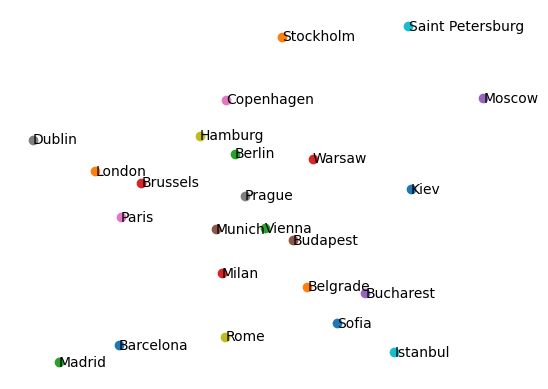

In [23]:
#make some positions (so we can plot this)
positions = dict( ( city, (position.loc[city, 'longitude'], position.loc[city, 'latitude']) ) for city in sites)
for s in positions:
    p = positions[s]
    plt.plot(p[0],p[1],'o')
    plt.text(p[0]+.01,p[1],s,horizontalalignment='left',verticalalignment='center')
    
plt.gca().axis('off');

In [24]:
# get distance between cities
distances = dict( ((s1,s2), distance.loc[s1, s2] ) for s1 in positions for s2 in positions if s1!=s2)

### The model

- The original traveling salesman problem can support multiple salesman (with some modifications in the problem definition)
- Instead of making each city/airport only be visited once, the origin city will be visited multiple times. If we have two salesman then the origin is visited exactly twice and so on.

______________________________________________

- For **K** vehicles or sales people:

#### Variables:

$x_{ij}=
\begin{cases}
1: \text{the path goes from city i to j}\\
0: \text{otherwise}
\end{cases}$

#### order dummy variables:

$u_i - u_j + C*x_{ij} \leq C - d_j, C = N/K$
$\begin{cases}
u_i: \text{order that site i is visited}\\
d_j: \text{the cost to visit city j}, 0 \leq u_i \leq C - d_j, \forall i \in V \setminus \{0\}
\end{cases}$

#### Goal:

$min\sum_{i=0}^{n}\sum_{j\neq{i}, j=0}^{n}{c_{ij}}{x_{ij}}$
$\begin{cases}
c_{ij}: \text{distance from city i to city j}\\
x_{ij}: \text{whether there's a path between i and j}
\end{cases}$

#### Constraints:

$\sum_{i\in{V}}{x_{ij} = 1}, \forall j \in V \setminus \{0\}$

$\sum_{j\in{V}}{x_{ij} = 1}, \forall i \in V \setminus \{0\}$

$\sum_{i\in{V}}{x_{i0} = K}$

$\sum_{j\in{V}}{x_{0j} = K}$

In [25]:
K = 4 #the number of sales people 
#create the problme
prob=LpProblem("vehicle", LpMinimize)

In [26]:
#indicator variable if site i is connected to site j in the tour
x = LpVariable.dicts('x',distances, 0,1,LpBinary)
#dummy vars to eliminate subtours
u = LpVariable.dicts('u', sites, 0, len(sites)-1, LpInteger)
#the objective
cost = lpSum([x[(i,j)]*distances[(i,j)] for (i,j) in distances])
prob+=cost

In [27]:
#constraints
for k in sites:
    cap = 1 if k != 'Berlin' else K
    #inbound connection
    prob+= lpSum([ x[(i,k)] for i in sites if (i,k) in x]) ==cap
    #outbound connection
    prob+=lpSum([ x[(k,i)] for i in sites if (k,i) in x]) ==cap
    
#subtour elimination
N=len(sites)/K
for i in sites:
    for j in sites:
        if i != j and (i != 'Berlin' and j!= 'Berlin') and (i,j) in x:
            prob += u[i] - u[j] <= (N)*(1-x[(i,j)]) - 1

In [28]:
%time prob.solve()
#prob.solve(solver=GLPK_CMD(options=['--simplex']))


print(LpStatus[prob.status])

CPU times: total: 0 ns
Wall time: 21min 56s


1

In [29]:
non_zero_edges = [ e for e in x if value(x[e]) != 0 ]

def get_next_site(parent):
    '''helper function to get the next edge'''
    edges = [e for e in non_zero_edges if e[0]==parent]
    for e in edges:
        non_zero_edges.remove(e)
    return edges
tours = get_next_site('Berlin')
tours = [ [e] for e in tours ]

for t in tours:
    while t[-1][1] !='Berlin':
        t.append(get_next_site(t[-1][1])[-1])

In [30]:
for t in tours:
    print(' -> '.join([ a for a,b in t]+['Berlin']))

Berlin -> Brussels -> Paris -> London -> Dublin -> Hamburg -> Berlin
Berlin -> Copenhagen -> Stockholm -> Saint Petersburg -> Moscow -> Kiev -> Warsaw -> Berlin
Berlin -> Prague -> Rome -> Barcelona -> Madrid -> Milan -> Munich -> Berlin
Berlin -> Vienna -> Belgrade -> Sofia -> Istanbul -> Bucharest -> Budapest -> Berlin


In [31]:
totalTime = 0;
for t in tours:
    time = 0
    for i in range(0, len(t)):
        time += flighttime.loc[t[i][0], t[i][1]]
#         print(flighttime.loc[t[i][0], t[i][1]])
#     print(time)
    if time > totalTime:
        totalTime = time
print(totalTime)

1988


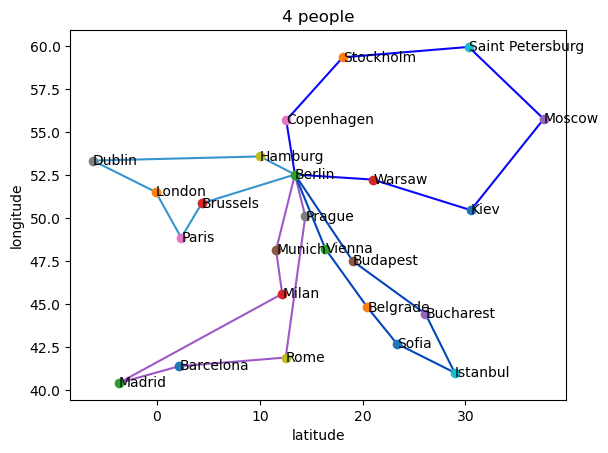

In [32]:
#draw the tours
colors = [np.random.rand(3) for i in range(len(tours))]
for t,c in zip(tours,colors):
    for a,b in t:
        p1,p2 = positions[a], positions[b]
        plt.plot([p1[0],p2[0]],[p1[1],p2[1]], color=c)

#draw the map again
for s in positions:
    p = positions[s]
    plt.plot(p[0],p[1],'o')
    plt.text(p[0]+.01,p[1],s,horizontalalignment='left',verticalalignment='center')
    
plt.title('%d '%K + 'people' if K > 1 else 'person')
plt.xlabel('latitude')
plt.ylabel('longitude')
# plt.gca().axis('off')
plt.show()

In [33]:
print('Longest time spent:', totalTime, '(min)')
print('Total distance:', value(prob.objective), '(km)')

Longest time spent: 1988 (min)
Total distance: 15425.02 (km)


In [34]:
plt.savefig('my_plot.png')

<Figure size 640x480 with 0 Axes>